# Assignment 1
## Problem 2

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

import warnings

warnings.filterwarnings("ignore")

5.18.0


### Read data and plot it

In this part, the dataset is imported using pandas. then, since there was a mismatch in values and indexes, they are manually stored in two new dataframes named x and y.

Next, the signal is plotted

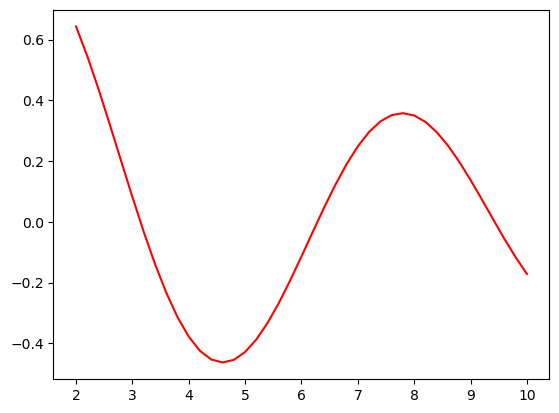

In [2]:
df = pd.read_csv('Dataset_II.csv')
x = np.array(df.values[0])
y = np.array(df.columns, dtype=float)
plt.plot(x,y , color = 'red')

Here, data is divided into train and test

In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x , train_y , test_y = train_test_split(x,y,test_size=0.3,random_state=101)

### (a) Fit a regression model using the following mathematical formulas:
f1(x) = w1 + w2x + w3x2

f2(x) = w1 + w2x + ... + w10x9

f3(x) = w1 + w2x + sin(x) + cos(x)

Desired mathematical functions are defined in the following code, and using curve_fit method from scipy, a curve is fit to the given train data.
This is worth noting that the parameters are already optimized.

In [4]:
import numpy as np
from scipy.optimize import curve_fit

# Define the models
def f1(x, w1, w2, w3):
    return w1 + w2*x + w3*x**2

def f2(x, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10):
    return w1 + w2*x + w3*x**2 + w4*x**3 + w5*x**4 + w6*x**5 + w7*x**6 + w8*x**7 + w9*x**8 + w10*x**9

def f3(x, w1, w2):
    return w1 + w2*x + np.sin(x) + np.cos(x)

# Fit the models to the data
popt1, pcov1 = curve_fit(f1, train_x, train_y)
popt2, pcov2 = curve_fit(f2, train_x, train_y)
popt3, pcov3 = curve_fit(f3, train_x, train_y)

# popt1, popt2, and popt3 contain the optimized parameters for each model


### (b) Evaluate the models using MSE and MAE. Tabulate the results. Look at which models performed better on this dataset and give your conclusion on the results.

### Calculate RMSE, MSE and MAE for each model

In [5]:
# Calculate the residuals for each model
residuals1 = train_y - f1(train_x, *popt1)
residuals2 = train_y - f2(train_x, *popt2)
residuals3 = train_y - f3(train_x, *popt3)

# Calculate the RMSE for each model
rmse1 = np.sqrt(np.mean(residuals1**2))
rmse2 = np.sqrt(np.mean(residuals2**2))
rmse3 = np.sqrt(np.mean(residuals3**2))

# Calculate the MSE for each model
mse1 = np.mean(residuals1**2)
mse2 = np.mean(residuals2**2)
mse3 = np.mean(residuals3**2)

# Calculate the MAE for each model
mae1 = np.mean(np.abs(residuals1))
mae2 = np.mean(np.abs(residuals2))
mae3 = np.mean(np.abs(residuals3))

print("MSE for f1: ", mse1)
print("MSE for f2: ", mse2)
print("MSE for f3: ", mse3)
print('.....................................')
print("MAE for f1: ", mae1)
print("MAE for f2: ", mae2)
print("MAE for f3: ", mae3)
print('.....................................')
print("RMSE for f1: ", rmse1)
print("RMSE for f2: ", rmse2)
print("RMSE for f3: ", rmse3)


MSE for f1:  0.08380058343296011
MSE for f2:  5.026595990308679e-10
MSE for f3:  0.5716359145611148
.....................................
MAE for f1:  0.26054239436901205
MAE for f2:  1.8403865009242728e-05
MAE for f3:  0.6457601651696866
.....................................
RMSE for f1:  0.28948330423870755
RMSE for f2:  2.2420071343126186e-05
RMSE for f3:  0.7560660781711575


In [6]:
import pandas as pd

# Create a dictionary with the calculated values
Measures = {
    'Model': ['f1', 'f2', 'f3'],
    'MSE': [mse1, mse2, mse3],
    'RMSE': [rmse1, rmse2, rmse3],
    'MAE': [mae1, mae2, mae3]
}

# Create a DataFrame from the dictionary
Measures = pd.DataFrame(Measures)
Measures

,Model,MSE,RMSE,MAE
0,f1,8.380058e-02,0.289483,0.260542
1,f2,5.026596e-10,0.000022,0.000018
2,f3,5.716359e-01,0.756066,0.645760


<Axes: ylabel='Model'>

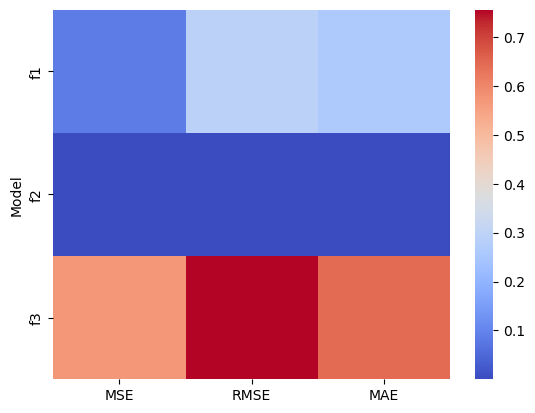

In [7]:
# Print the DataFrame
sns.heatmap(Measures.set_index('Model') , cmap = 'coolwarm')


We can observe that function 2, which is 9th degree polynomial has a great performance in comparison to the other models. this might be due to the complexity of this model.
* Important Note:
Since this values are calculated based on training data, it is possible that overfitting had happened and the model has poor performance on test data. in the following sections, performance of these models are examined on test data to verify this issue

### Plot Actual vs Predicted values of each model on test data

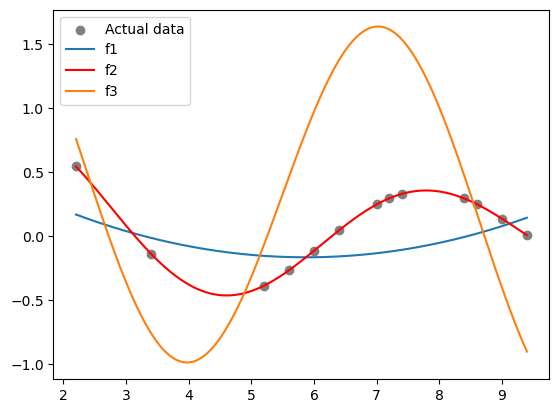

In [8]:
# Generate a sequence of x values from the minimum to the maximum x value in your data
x_seq = np.linspace(min(test_x), max(test_x), 1000)

# Calculate the corresponding y values for each model
y_seq1 = f1(x_seq, *popt1)
y_seq2 = f2(x_seq, *popt2)
y_seq3 = f3(x_seq, *popt3)

# Plot the actual data
plt.scatter(test_x, test_y, label='Actual data' , color = 'gray')

# Plot each model
plt.plot(x_seq, y_seq1, label='f1')
plt.plot(x_seq, y_seq2, label='f2' , color  = 'red')
plt.plot(x_seq, y_seq3, label='f3')

# Add a legend
plt.legend()

# Show the plot
plt.show()


##### Result:
###### As shown in figure above, we can see that model f2 have a significant advantage to other models in predicting the output value. Also, this calrifies that overfitting did not happen and the performance of this model is still acceptable on unseen data 
    